## Part 2: Python for Data Analysis
### An Analysis of AirBnB Listings
This section is intended to introduce you to data analysis concepts in Python through an interactive exercise. The purpose of this exercise is to learn some basic data analysis and visualization techniques in Python while exploring the AirBnB listings data set for trends and other interesting insights. 

**Research question:** What factors impact review scores for AirBnB listings?

## Import Libraries and Load Data

### What Is a Library?
A library in Python is a collection of functions and methods that allows you to perform many actions without hardcoding the solution. 
* **Pandas** = DataFrame & Series manipulation for data management
* **Numpy** = Array manipulation and management (similar to MATLAB)
* **OS** = Interface with underlying operating system
* **Seaborn** = High-level data visualization interface
* **Matplotlib** = Manipulate figures, visualzations, and representations
* **Datetime** = Manipulate date and time data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

Now we need to see the filepath where the Jupyter Notebook is operating in and make sure it is the same folder/directory where our AirBnB dataset is located.  

If the Notebook and the dataset are not in the same folder then make sure you set the correct filepath when you are reading in the data

In [2]:
# Get current working directory
os.getcwd()

'C:\\Users\\rrasheed\\Desktop\\Python 101'

### What is a DataFrame?
It's time to load in the data! The pandas library is the best library for importing structured/tabular data. All you need to do is specify the file type and know the name of the file. Since our dataset is a CSV, we will be using the read_csv() method. This function finds your file and loads it into a DataFrame.

Series can only contain single list with index, whereas dataframe can be made of more than one series or we can say that a dataframe is a collection of series that can be used to analyse the data

In [3]:
# Read csv into a pandas dataframe
df = pd.read_csv('airbnb.csv')

C:\Users\rrasheed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Do not be alarmed if you recieve a DtypeWarning after successfully loading in the dataset. According to the the DtypeWarning we are seeing, Column 22 has mixed datatypes, which poses some major issues if not properly addressed. 

In [4]:
# Identify DtypeWarning in the DataFrame 
df.columns[22]

'zipcode'

In [5]:
# Read in your data set but this time specify the data type
df = pd.read_csv('airbnb.csv', dtype={'zipcode':str})

Now that we have sucessfully loaded our AirBnB dataset and specified the data type for certain columns, let's gather some high level information about our DataFrame. 

In [6]:
# Let's find out the dimensions of our data set
print(df.shape)
print(df.size)

(99569, 23)
2290087


In [7]:
# Output some general information about your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99569 entries, 0 to 99568
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            99569 non-null  int64  
 1   bathrooms               99569 non-null  float64
 2   bed_type                99569 non-null  object 
 3   bedrooms                99569 non-null  int64  
 4   beds                    99569 non-null  int64  
 5   cancellation_policy     99569 non-null  object 
 6   city                    99569 non-null  object 
 7   cleaning_fee            99569 non-null  bool   
 8   first_review            58247 non-null  object 
 9   host_has_profile_pic    99569 non-null  object 
 10  host_identity_verified  99569 non-null  object 
 11  host_response_rate      99569 non-null  int64  
 12  host_since              73923 non-null  object 
 13  instant_bookable        99569 non-null  object 
 14  last_review             58284 non-null

In [8]:
# Get the first 5 rows
df.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode
0,1,1.0,Real Bed,1,1,flexible,SF,True,8/15/2016,t,...,t,1/18/2017,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202\r\r\r\r\r\r\r
1,1,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.135680,-118.400691,Studio City,6,House,100,Private room,91604-3646
2,2,1.0,Real Bed,1,1,moderate,LA,True,11/16/2011,t,...,f,4/8/2017,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001-2243
3,2,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403-2638
4,2,1.0,Real Bed,1,1,moderate,LA,True,9/6/2010,t,...,f,2/28/2017,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039-2715


In [9]:
# Reference/slice your data using numeric indexing
# Indexing starts at 0 rather than 1
# Get first 5 rows of the 'zipcode' column/Series
df.iloc[:5,[22]]

,zipcode
0,95202\r\r\r\r\r\r\r
1,91604-3646
2,91001-2243
3,90403-2638
4,90039-2715


In [10]:
# Reference/slice your data using string indexing
# Get first 5 rows of the 'zipcode' column/Series
df.loc[:5, ['zipcode']]

,zipcode
0,95202\r\r\r\r\r\r\r
1,91604-3646
2,91001-2243
3,90403-2638
4,90039-2715
5,90036-2514


## Data Cleaning

Data cleaning is the process of detecting and correcting corrupt or inaccurate records. This is an extremely important step that takes up most of the Data Science pipeline. In these next cells, we will be modifying all of the messy, incomplete, or incorect records. 

Before we start cleaning the dataset, it is important to undrsatnd how to index our DataFrame and locate the corect information

In [11]:
# Subset your data
df.loc[(df['city']=='LA')].head()

# df.zipcode[(df.city=='LA') & (df.property_type=='Apartment')].head()

2    91001-2243
3    90403-2638
6    90035-4475
7    90034-2203
8    90005-3747
Name: zipcode, dtype: object

In [12]:
# Clean zip code data

# Extract only the first 5 characters 
df['zipcode'] = df['zipcode'].str[:5]

# left pad string with zeros up to 5 characters
df['zipcode'] = df['zipcode'].str.zfill(5)
df['zipcode'].head(10)

0    95202
1    91604
2    91001
3    90403
4    90039
5    90036
6    90035
7    90034
8    90005
9    60660
Name: zipcode, dtype: object

In [13]:
# Convert date fields to datetime
print(df['first_review'].dtypes)
df['first_review'] = pd.to_datetime(df['first_review'])
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])
print(df['first_review'].dtypes)

object
datetime64[ns]


In [14]:
# Convert binary variables to 0 and 1 for consistency
# Try not to rely on for loops to iterate through the data
df['cleaning_fee'] = np.where(df['cleaning_fee']==True, 1, 0)
df['host_has_profile_pic'] = np.where(df['host_has_profile_pic']=='t',1,0)
df['host_identity_verified'] = np.where(df['host_identity_verified']=='t',1,0)
df['instant_bookable'] = np.where(df['instant_bookable']=='t',1,0)

In [15]:
df.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode
0,1,1.0,Real Bed,1,1,flexible,SF,1,2016-08-15,1,...,1,2017-01-18,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202
1,1,1.0,Real Bed,1,1,flexible,LA,0,NaT,1,...,0,NaT,34.135680,-118.400691,Studio City,6,House,100,Private room,91604
2,2,1.0,Real Bed,1,1,moderate,LA,1,2011-11-16,1,...,0,2017-04-08,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001
3,2,1.0,Real Bed,1,1,flexible,LA,0,NaT,1,...,0,NaT,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403
4,2,1.0,Real Bed,1,1,moderate,LA,1,2010-09-06,1,...,0,2017-02-28,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039


## Feature Engineering

Feature engineering is a process where you transform variables or create new variables for the purpose of improving model performance.

In [16]:
df['property_type'].value_counts()

Apartment             65675
House                 22321
Condominium            3609
Townhouse              2234
Loft                   1681
Other                   805
Guesthouse              672
Bed & Breakfast         625
Bungalow                483
Villa                   237
Dorm                    203
Guest suite             172
Camper/RV               125
Timeshare               108
Hostel                  101
Boutique hotel          100
In-law                   99
Cabin                    91
Boat                     87
Serviced apartment       27
Tent                     20
Vacation home            16
Castle                   15
Treehouse                14
Yurt                     12
Earth House               8
Hut                       8
Chalet                    7
Tipi                      4
Train                     3
Cave                      3
Island                    1
Casa particular           1
Lighthouse                1
Parking Space             1
Name: property_type,

In [17]:
df['property_type_feature'] = df['property_type']

df['property_type_feature'][(df['property_type_feature'] != 'Apartment') & 
                            (df['property_type_feature'] != 'House')] = 'Other'

C:\Users\rrasheed\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df['property_type_feature'].value_counts()

Apartment    65675
House        22321
Other        11573
Name: property_type_feature, dtype: int64

You are able to calculate basic statistics(mean, median, mode) using DataFrame methods

In [20]:
# Segmenting
med_score = df['review_scores_rating'].mean()
med_score

94.49183982966586

In [21]:
df['below_average'] = np.where(df['review_scores_rating'] < med_score, 1, 0)
df.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,property_type_feature,below_average
0,1,1.0,Real Bed,1,1,flexible,SF,1,2016-08-15,1,...,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202,Apartment,0
1,1,1.0,Real Bed,1,1,flexible,LA,0,NaT,1,...,34.135680,-118.400691,Studio City,6,House,100,Private room,91604,House,0
2,2,1.0,Real Bed,1,1,moderate,LA,1,2011-11-16,1,...,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001,Apartment,0
3,2,1.0,Real Bed,1,1,flexible,LA,0,NaT,1,...,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403,Apartment,0
4,2,1.0,Real Bed,1,1,moderate,LA,1,2010-09-06,1,...,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039,House,0


### Encoding using pd.get_dummies()

pd.get_dummies() is a very common data manipulation feature that tackles the problem of categorical variables. The method assigns a "dummy" or indicator variable in place of the actual categorical variable. In the cells below, we are encoding these categorical features and assigning the resultant DataFrame to a new name called df_dummy. This way we are not over writing our original dataset. 

In [22]:
df.bed_type.unique()

array(['Real Bed', 'Futon', 'Couch', 'Airbed', 'Pull-out Sofa'],
      dtype=object)

In [23]:
df.city.unique()

array(['SF', 'LA', 'Chicago', 'DC', 'NYC', 'Boston'], dtype=object)

In [24]:
categorical_feats = ['bed_type', 'cancellation_policy', 'city', 'property_type_feature', 'room_type']
df_dummy = pd.get_dummies(df, columns=categorical_feats, drop_first=True)
df_dummy.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,...,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,property_type_feature_House,property_type_feature_Other,room_type_Private room,room_type_Shared room
0,1,1.0,1,1,1,2016-08-15,1,1,100,2013-07-04,...,0,0,0,0,0,1,0,0,1,0
1,1,1.0,1,1,0,NaT,1,0,100,NaT,...,0,0,0,1,0,0,1,0,1,0
2,2,1.0,1,1,1,2011-11-16,1,1,100,2011-09-19,...,0,0,0,1,0,0,0,0,0,0
3,2,1.0,1,1,0,NaT,1,0,100,2016-03-07,...,0,0,0,1,0,0,0,0,1,0
4,2,1.0,1,1,1,2010-09-06,1,1,100,2010-08-04,...,0,0,0,1,0,0,1,0,1,0


### Lambda Functions

Lambda functions are very helpful to organize and execute small, anonymous functions. For example, instead of defining a new function for a simple one-line calculation, you can create a lambda function. These functions come in handy when dealng with "big data". 

In [25]:
# Lambda function coupled with apply on a pandas series
df = df.sort_values(by='first_review')
df['month'] = df['first_review'].apply(lambda x: x.month)
df.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,property_type_feature,below_average,month
50252,1,1.0,Pull-out Sofa,1,1,moderate,DC,0,2008-11-17,1,...,-77.023798,Shaw,31,Apartment,88,Shared room,20001,Apartment,1,11.0
44497,9,1.0,Real Bed,2,2,strict,DC,1,2009-01-20,1,...,-76.989360,Michigan Park,138,House,86,Entire home/apt,20017,House,1,1.0
46034,2,1.0,Real Bed,1,1,moderate,DC,0,2009-01-21,1,...,-77.039265,Mt. Pleasant,1,Other,96,Private room,20009,Other,0,1.0
49856,16,3.5,Real Bed,4,6,strict,DC,1,2009-01-21,1,...,-77.019331,Shaw,110,House,96,Entire home/apt,20001,House,0,1.0
77307,2,1.0,Real Bed,1,1,moderate,NYC,0,2009-03-12,1,...,-73.988667,Hell's Kitchen,131,Apartment,96,Private room,10036,Apartment,0,3.0


In [ ]:
# This does the same thing functionally as lambda function above
# This function takes in an input parameter called "date" and returns the month of that date.
def retrieveMonth(date):
    return date.month

## Data Exploration/Visualization

Data Visualization is an interdisciplinary field that allows you to tell a story with your data. After you have cleansed and engineering your data, it is time to gain insight through various graphs and representations. Make sure you take time to fine-tune your visualizations sine they are the method you use to communicate your findings. 

In [26]:
# We can make pivot tables using pandas just like we would in excel
df_pivot = pd.pivot_table(df,
               values=['review_scores_rating', 'host_response_rate'],
               index='neighbourhood', 
               aggfunc={'review_scores_rating': np.mean,
                        'host_response_rate': np.mean})[['review_scores_rating', 'host_response_rate']]
df_pivot.head()

,review_scores_rating,host_response_rate
neighbourhood,,
16th Street Heights,95.530769,97.423077
Adams Morgan,95.381818,95.200000
Alamo Square,96.124031,93.775194
Albany Park,96.541667,99.166667
Alhambra,94.666667,98.545455


We might hypothesize that review scores and response rate are correlated. Let's see how that pans out by plotting the correlation.


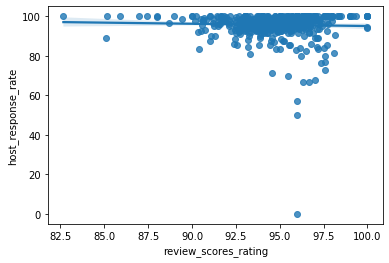

In [27]:
sns.regplot(x="review_scores_rating", y="host_response_rate", data=df_pivot);

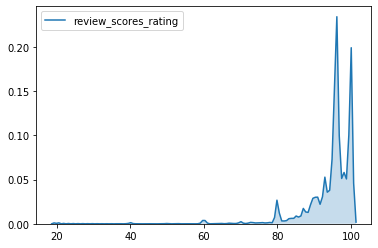

In [28]:
sns.kdeplot(df['review_scores_rating'], shade=True)

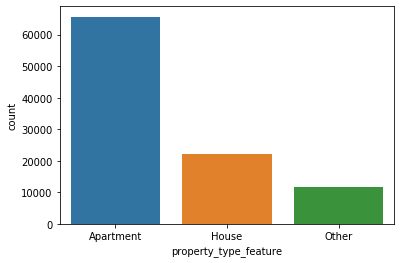

In [29]:
sns.countplot(x='property_type_feature', data=df)

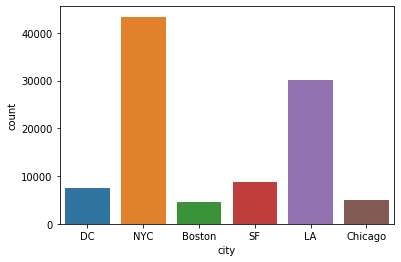

In [30]:
sns.countplot(x='city', data=df)

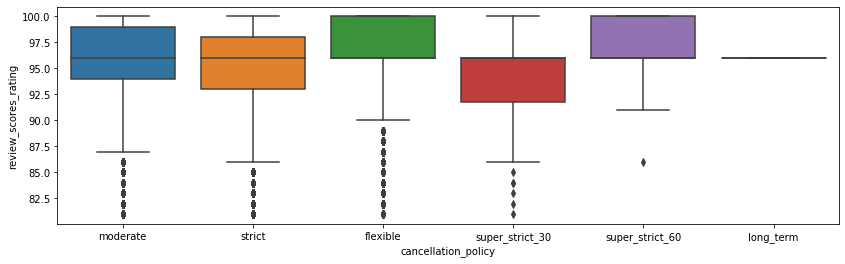

In [31]:
plt.figure(figsize=(14, 4))
sns.boxplot(x='cancellation_policy', y='review_scores_rating', data=df[df['review_scores_rating']>80])

C:\Users\rrasheed\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


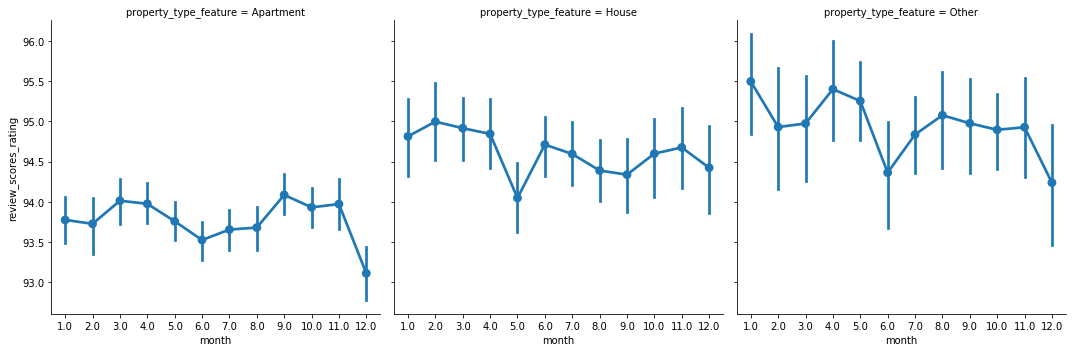

In [32]:
sns.factorplot(data= df, 
               x= 'month',
               y= 'review_scores_rating',
               col='property_type_feature'
              )